In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from textblob import TextBlob
#her kelime pozitif veya negatif bir değer alır

#Dil tespit etmek için
from langdetect import detect

#Sentiment analiz yapmak için
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

#Bulut resmi için
import os
from PIL import Image

#NLP
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer

from nltk.corpus import stopwords
from stop_words import get_stop_words
import re
#WordCloud
from wordcloud import WordCloud,STOPWORDS

#Machine learning
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score


from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,classification_report

In [3]:
!pip install nltk

- nltk : Natural language tool kit

In [4]:
import nltk
from nltk.tokenize import sent_tokenize

- tokenize: parçalara ayırmaya yarar.
- sent_tokenize: Bir paragrafı cümlelerine ayırır ve bunları bir dizi haline getirir.Bir kitabıda versen cümlelerine ayırır.(sentences tokenize)
- word_tokenize: Bir cümledeki tüm kelimeleri ayırı ve bir listeye çevirir.

  - from nltk.tokenize import TreeBankWordTokenizer
  - t=TreeBankWordTokenizer()
  - t.tokenize('.....')
    - word_tokenizer ile aynı işlemi yapar.Bir cümleyi kelimelerine ayırıp listeye atar.
    - NOT: Yeni cümleyi anlaması için . koyman ve bir boşluk bırakıp büyük harf ile başlaman gerekir.

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arise\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arise\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

- nltk de çok fazla paket olduğundan sadece ihtiyacımız olanları indireceğiz.

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arise\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- stopwords: Dildeki gereksiz kelimelerdir.Mesela konuşmacının cümle sonunda anladın mı?/eeee gibi sıklıkla kullandığı kelimeler gibi.

In [8]:
print(nltk.corpus.stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

- Stopwords demişken bu kod ile ingilizcedeki gereksiz kelimeleri yazdırır.Gelin bir de türkçede ki gereksiz kelimelere bakalım.

In [9]:
print(nltk.corpus.stopwords.words('turkish'))

['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani']


- Stemmer: Kelimedeki ekleri atmaya yarar.
- Lemmatizer: Kelimenin kökünü bulmaya yarar.

- NLP de bütün kelimeleri 1 lere veya 0 lara çeviriyoruz.Dummie variable da yaptığımız şeyi daha profesyonel bir şekilde yapıyoruz.Her kelimeyi vektör olarak kabul ediyor ve ona çokboyutlu uzayda bir yer belirliyor.

In [10]:
df=pd.read_csv('restaurant.csv')

In [11]:
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17
...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51


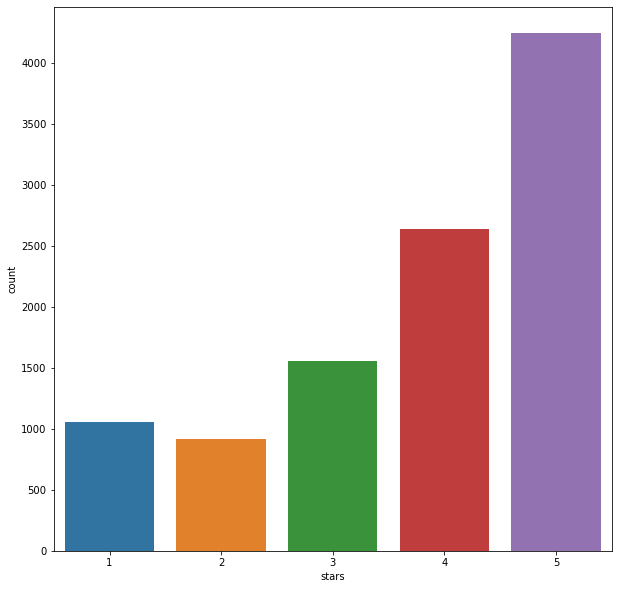

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(df['stars']);

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


### Cleaning the data

#### Common data cleaning steps on all text:

- Make text all lower case
- Remove punctuation
- Remove numerical values
- Tokenize text
- Remove stop words

#### More data cleaning steps after tokenization:

- Stemming/lemmatization
- Parts of speech tagging
- Create bi-grams or tri-grams
- Deal with typos(correct to wrong words)
- And more..

### NLP projesi adımları
- 1-Bütün cümleler küçük harfe çevirilir
- 2-Noktalama işaretleri kaldırılır.
- 3-Rakamları kaldır.
- 4-Satır sonu,\n enter a basılmışsa \r
  - Sen yazı yazarken enter a basarsan orada senin görmediğin \r koyar bilgisayar 
- 5-stop words(gereksiz kelimeler) leri kaldır.(am/is/are gibi)
- 6-Tokenize işlemi yapıyoruz
- 7-Lemma ve stemma uygula(ekleri kaldırıp kökleri buluyoruz)
- 8-vectorizer ile yazıları rakama atıyoruz(dummie_variables gibi)
- 9-Sentimant analizimize başlayabiliriz
  - Yazılan şey olumlu mu olumsuz mu nötr mü bakacağız(3 seçenek olduğundan MultinominalNB ile bakacağız)

- Removing Characters
  - numbers (1-9)
  - punctuation ()
  - new line (\n)
  - Convert Lower Case

In [14]:
df['text']=df['text'].str.lower()

- Tüm kelimeler küçük harfe çevrildi.

In [15]:
df['text']=df['text'].str.replace('[^\w\s]','')

- Noktalama işratelerini kaldırdık.
- replace ile bu noktalama işartelerini hiçlikle değiştirdik.
- Not: "str." eklemeyi unutursan veriyi düzgün şekilde temizlemez.

In [16]:
df['text']=df['text'].str.replace('\d+','')

- Digit yani rakamları kaldırdık.

In [17]:
df['text']=df['text'].str.replace('\n',' ').replace('\r','')

- '\n',' ' burada boşluk var çünkü alt satıra geçmiş yan yana yazmasın diye(n:new line)
- r de enter olduğu için paragraf zaten bitmiş anlamına gelir(r:enter a basılmış)
- Satır sonu işaretleri kaldırılır(n yeni satır demek r enter a basılmış demek)

In [18]:
df.loc[(df['stars']==1)|(df['stars']==2),'sentiment']='negative'
df.loc[(df['stars']==3),'sentiment']='neutral'
df.loc[(df['stars']==4)|(df['stars']==5),'sentiment']='positive'

- Adding Sentiment Features
  - 1,2 —> Negative
  - 3 —> Neutral
  - 4,5 —> Positive

- Bir kişi restoranı puanlarken 4 veya 5 puan verdiyse o kişinin olumlu bir yorum yaptığını,1 veya 2 puan vermişse olumsuz bir yorum yaptığını,3 puan verdiyse nötr bir yorum yaptığını varsayıyoruz.

In [19]:
df=df[['stars','sentiment','text']]
df

,stars,sentiment,text
0,5,positive,after getting food poisoning at the palms hote...
1,4,positive,a feast worthy of gods baccarnal buffet in ca...
2,4,positive,the crab legs are better than the ones at wick...
3,1,negative,not worth it too salty food and expensive this...
4,5,positive,i would give this infinite stars if i could my...
...,...,...,...
10412,5,positive,best buffet ever irma was great served us bett...
10413,4,positive,hollllllyyyy moleyyyy this buffet was one fo...
10414,5,positive,the selection is amazing and all the food is e...
10415,4,positive,one of the best buffets ive had in vegas my on...


- Detecting Language
  - Removing non English

- İngilizce olmayan yorumları atacağım.Bu işlem için future engineering ile yeni bir sütun açıyorum ve dili tespit ediyorum(detect ile).Ve sadece ingilizce yorumları bu sütuna eşitliyorum.

In [20]:
df['language']=df['text'].apply(detect)
df=df[df['language']=='en']

In [21]:
df

,stars,sentiment,text,language
0,5,positive,after getting food poisoning at the palms hote...,en
1,4,positive,a feast worthy of gods baccarnal buffet in ca...,en
2,4,positive,the crab legs are better than the ones at wick...,en
3,1,negative,not worth it too salty food and expensive this...,en
4,5,positive,i would give this infinite stars if i could my...,en
...,...,...,...,...
10412,5,positive,best buffet ever irma was great served us bett...,en
10413,4,positive,hollllllyyyy moleyyyy this buffet was one fo...,en
10414,5,positive,the selection is amazing and all the food is e...,en
10415,4,positive,one of the best buffets ive had in vegas my on...,en


- Sentiment analysis : Duygu analizi temelde yazarın tutumunu veya duygusunu, yani olumlu mu olumsuz mu yoksa nötr mü olduğunu belirleme sürecidir.
- textblob iki özellik döner:polarity ve subjectivity.
  - Polarity: [-1,1] arasında değer alır ve 1 pozitif cümleyi, -1 ise negatif cümleyi ifade eder.
  - Subjectivity: Genellikle kişisel fikri ifade eder ve [0,1] arasında değer alır.

In [22]:
df[['polarity','subjectivity']]=df['text'].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [23]:
df

,stars,sentiment,text,language,polarity,subjectivity
0,5,positive,after getting food poisoning at the palms hote...,en,0.367452,0.605702
1,4,positive,a feast worthy of gods baccarnal buffet in ca...,en,0.219409,0.537292
2,4,positive,the crab legs are better than the ones at wick...,en,-0.134722,0.731944
3,1,negative,not worth it too salty food and expensive this...,en,-0.325000,0.400000
4,5,positive,i would give this infinite stars if i could my...,en,0.362500,0.725000
...,...,...,...,...,...,...
10412,5,positive,best buffet ever irma was great served us bett...,en,0.543750,0.481250
10413,4,positive,hollllllyyyy moleyyyy this buffet was one fo...,en,0.210101,0.586869
10414,5,positive,the selection is amazing and all the food is e...,en,0.480000,0.630000
10415,4,positive,one of the best buffets ive had in vegas my on...,en,0.185185,0.533333


In [75]:
df.sentiment.value_counts()

positive    6852
negative    1964
neutral     1557
Name: sentiment, dtype: int64

- Toplam pozitif,negatif ve nötr yorumların sayısını gördük.Pozitif yorumların çoğunlukta olduğunu görüyoruz.

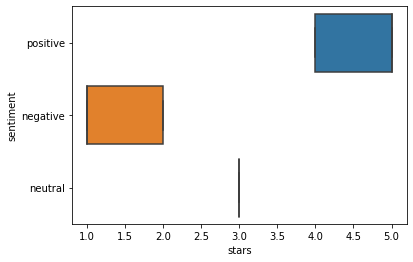

In [24]:
sns.boxplot(y='sentiment',x='stars',data=df);

In [25]:
def create_wordcloud(text):
    mask = np.array(Image.open("Image\cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=25000,
                  stopwords=stopwords)
    wc.generate(str(text))
    wc.to_file("Image\cloud.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))


- text1=df[df["stars"]==3]
- create_wordcloud(text1.text)
  - Bir kere çalıştırıp resmi oluşturduktan sonra marktown a çeviriyorum çünkü her seferinde oluştursun istemiyorum.

## <font color=red> Nötr ( 3 yıldızlı yorumlar )

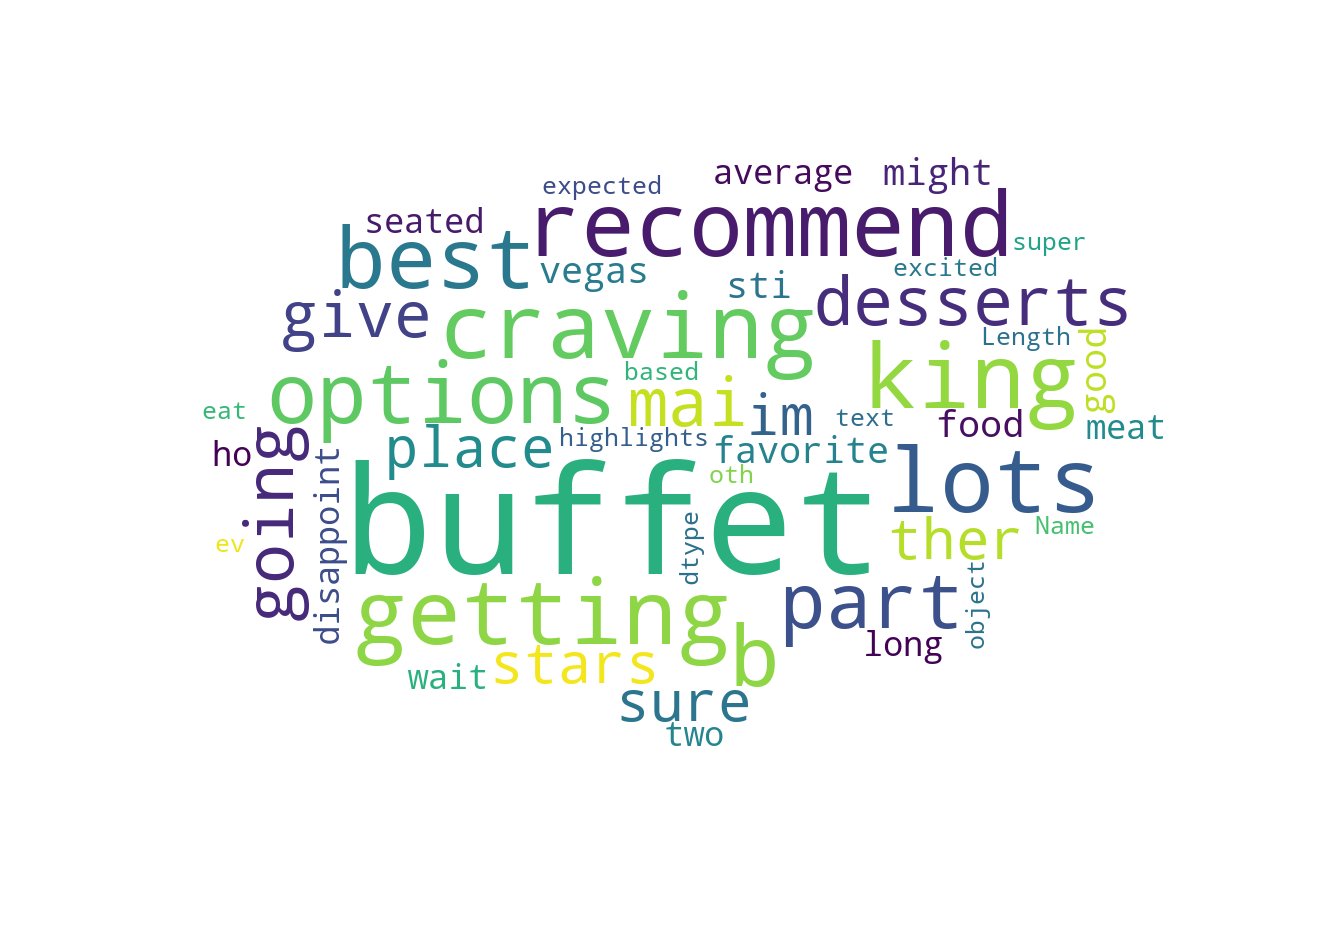

## <font color=red> Positif ( 4 ve 5 yıldızlı yorumlar )

text2=df[(df["stars"]==4)|(df["stars"]==5)]
create_wordcloud(text2.text)

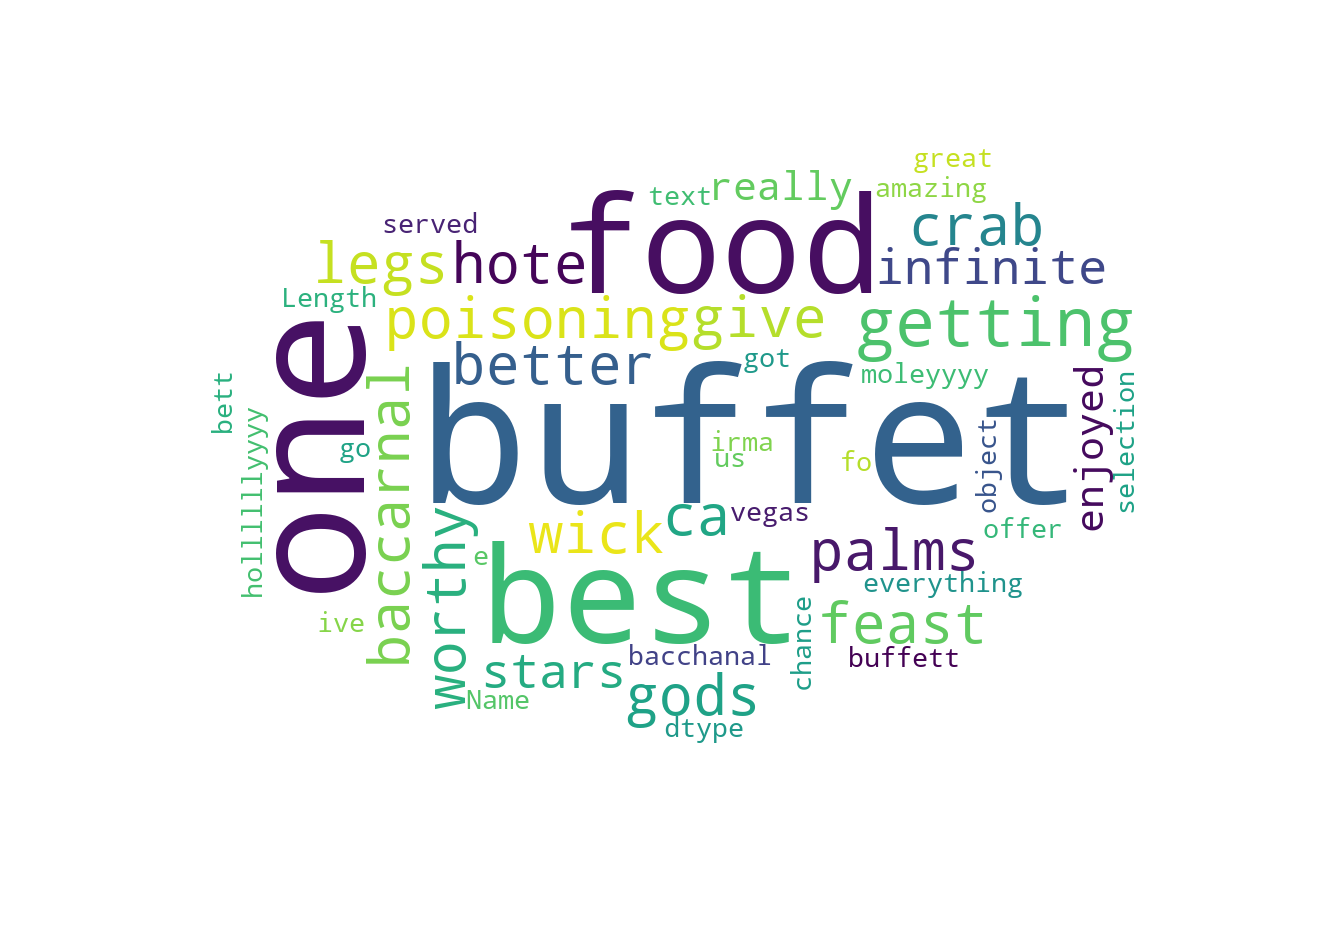

## <font color=red> Negatif ( 1 ve 2 yıldızlı yorumlar)

text3=df[(df["stars"]==1)|(df["stars"]==2)]
create_wordcloud(text3.text)

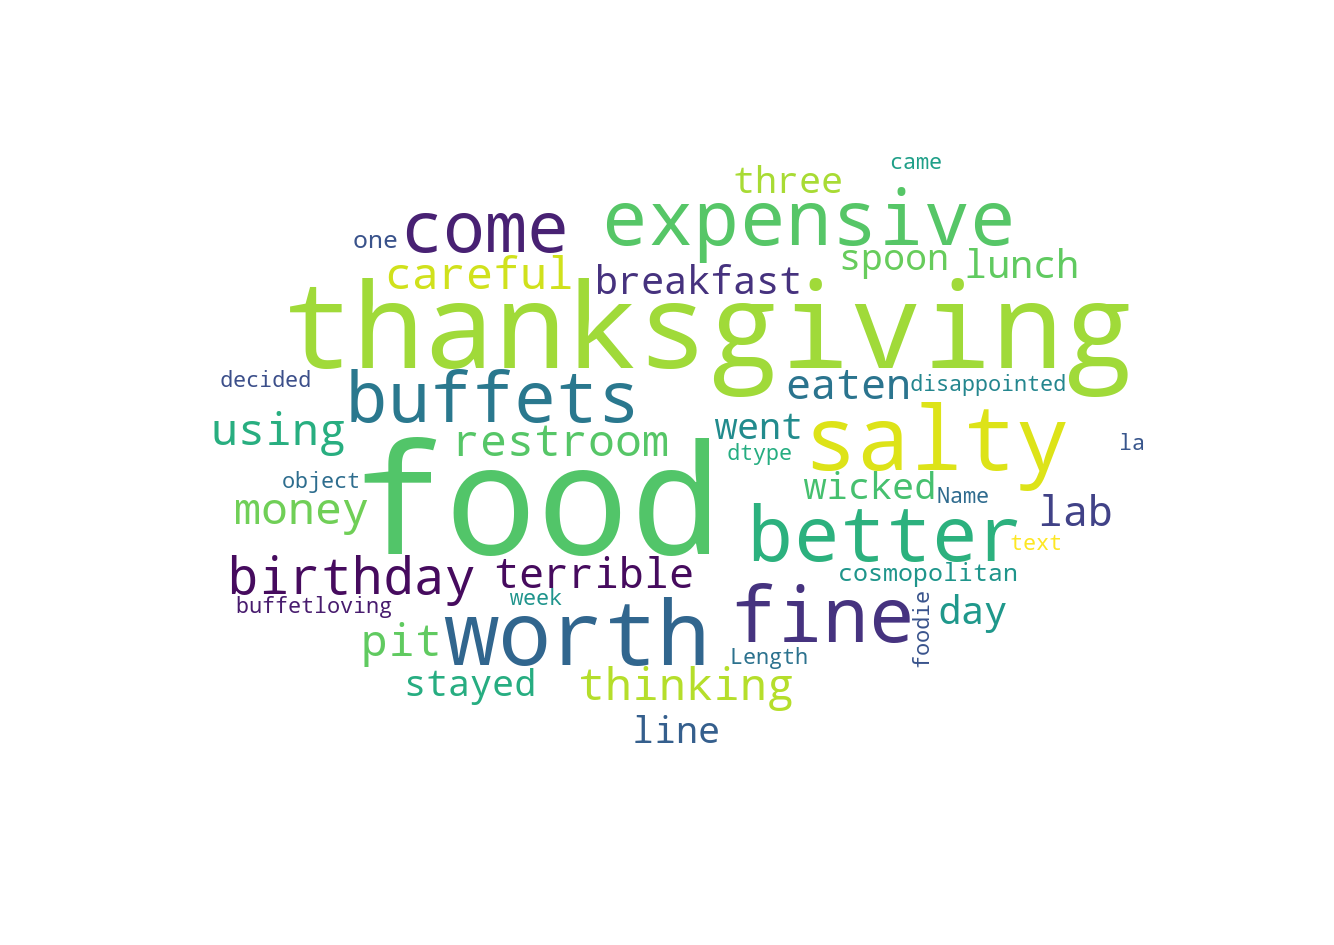

- Split dataset into X (feature) and y (target)
- Split dataset into training and test sets 


In [76]:
X=df.text
y=df.sentiment

In [80]:
pd.DataFrame(X.head(5))

,text
0,after getting food poisoning at the palms hote...
1,a feast worthy of gods baccarnal buffet in ca...
2,the crab legs are better than the ones at wick...
3,not worth it too salty food and expensive this...
4,i would give this infinite stars if i could my...


In [81]:
pd.DataFrame(y.head(5))

,sentiment
0,positive
1,positive
2,positive
3,negative
4,positive


In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [84]:
vec=CountVectorizer(stop_words='english')
X_train_vec=vec.fit_transform(X_train)
X_test_vec=vec.transform(X_test)

- Vektöre çevirdik(fit_transform yazıyı öğren ve vektöre çevir)
  - X_test için fit_transform değilde sadece transform yaptık çünkü X_train i çevirirken zaten öğrenmişti.

- .toarray() ile array haline çevirdik,sütun isimlerini get_feature_names ile aldık ve dataframe e çevirip yazdırdık.

In [86]:
pd.DataFrame(X_train_vec.toarray(),columns=vec.get_feature_names()).sample(10)

,__,___,____,_________________________,_really_,_that_,aa,aaa,aaaah,aaahhh,...,皮蛋瘦肉粥,第一次去沒有傳說中那麼神奇,羊排一般太熟沒有水分而且不夠熱,蒙古牛肉,蝦餃,裡面地方很大從自己桌子出發去拿一盤東西再走回來已經佔用了他們所限定時間兩小時裡的相當一部分時間,過了下午六點後才拿出來跟雪蟹混在一起跟其他所有菜一樣拿起來不太容易因為放的太靠內距離太遠,食物的選擇蠻多的也不錯不過牡蠣倒是不怎麼樣,饥饿营销明明里面很多空位还告诉我们要排队个半小时到个小时大厅很暗淡黑灯瞎火的食物一般吧就蟹比较新鲜好吃性价比不太高有点失望they,魚香茄子
1369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
vec2=CountVectorizer(ngram_range=(1,2),stop_words='english',binary=True)
X_train_vec2=vec2.fit_transform(X_train)
X_test_vec2=vec2.transform(X_test)

- ngram ı basitçe anlatmak gerekirse:
  - Bazen dilde yanına bir kelime gelmedikçe anlamlı olmayan veya yanına(önüne veya arkasına) gelen kelimeyle farklı anlamlar kazanan kelimeler vardır.Biz bu kelimeleri bir dökümanda okurken farketmeyiz çünkü dökümanın tamamını -yani o kelimenin hem önündeki hem arkasındaki kelimeyide- okuduğumuz için o kelimenin orada hangi anlamıyla kullanıldığını anlarız.Sesteş kelimelerden bahsediyorum.('Döndü' şiirindeki gibi)Aslında ngram ile yapay zekaya da aynı şeyi yaptırıyoruz.O kelimenin hem arkasına hem önüne bak ki ne anlamda kullanılmış anla diyoruz.

In [108]:
lr=LogisticRegression()
pred_vec=lr.fit(X_train_vec,y_train).predict(X_test_vec)
accuracy=accuracy_score(y_test,pred_vec)
accuracy

0.7853470437017995

In [109]:
precision=precision_score(y_test,pred_vec,average='weighted')
precision

0.7717866490587548

In [110]:
f1=f1_score(y_test,pred_vec,average='weighted')
f1

0.7774300916343937

In [111]:
recall=recall_score(y_test,pred_vec,average='weighted')
recall

0.7853470437017995

In [112]:
vec1=[accuracy,precision,f1,recall]

In [100]:
confusion_matrix(y_test,pred_vec)

array([[ 375,  115,   94],
       [ 122,  176,  179],
       [  58,  100, 1893]], dtype=int64)

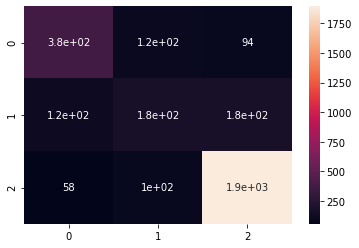

In [105]:
sns.heatmap(confusion_matrix(y_test,pred_vec),annot=True);

In [119]:
pred_vec2=lr.fit(X_train_vec2,y_train).predict(X_test_vec2)
accuracy=accuracy_score(y_test,pred_vec2)
accuracy

0.8071979434447301

In [120]:
precision=precision_score(y_test,pred_vec2,average='weighted')
precision

0.7852362741014941

In [121]:
f1=f1_score(y_test,pred_vec2,average='weighted')
f1

0.7907348345370954

In [122]:
recall=recall_score(y_test,pred_vec2,average='weighted')
recall

0.8071979434447301

In [123]:
vec2=[accuracy,precision,f1,recall]

In [106]:
confusion_matrix(y_test,pred_vec2)

array([[ 404,   82,   98],
       [ 119,  150,  208],
       [  38,   55, 1958]], dtype=int64)

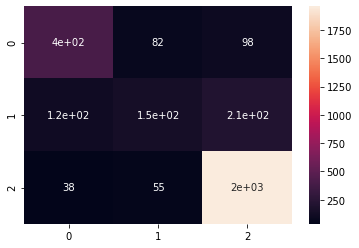

In [107]:
sns.heatmap(confusion_matrix(y_test,pred_vec2),annot=True);

- Şimdi tüm ölçümleri bir tablo halinde görelim
  - zip ile verileri aynı tabloda toplayabildik.

In [129]:
result=pd.DataFrame(list(zip(vec1,vec2)))
result=result.set_index([['Accuracy','Precision','F1','Recall']])
result.columns=['LogisticR_CountVectorizer','LogisticR_CountVectorizer_Ngram']
result

,LogisticR_CountVectorizer,LogisticR_CountVectorizer_Ngram
Accuracy,0.785347,0.807198
Precision,0.771787,0.785236
F1,0.777430,0.790735
Recall,0.785347,0.807198


- Şimdi ben bu tabloyu tüm Classification modelleri için bulmak istiyorum ama tek tek her biri için aynı kodları yazmak istemiyorum bu sebeple bir fonksiyon oluşturacağım:

## CountVectorizer

In [135]:
classifiers=[
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
]

cvec_col=['Classifier','Methods','Accuracy','Precision','F1','Recall']
cvec=pd.DataFrame(columns=cvec_col)

for i in classifiers:
    pred=i.fit(X_train_vec,y_train).predict(X_test_vec)
    name = i.__class__.__name__
    #Yukarıda tanımladığımız modelleri sırasıyla çağıracağız ve isminide tabloya bu kod ile ekliyoruz.
    
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred,average='weighted')
    f1=f1_score(y_test,pred,average='weighted')
    recall=recall_score(y_test,pred,average='weighted')

    cvec_entry=pd.DataFrame([[name,'CountVectorizer',accuracy*100,precision*100,f1*100,recall*100]],columns=cvec_col)
    #score ları 100 ile çarpmamın sebebi , yüzde başarı oranının daha net görülebilmesi
    cvec=cvec.append(cvec_entry)

cvec

,Classifier,Methods,Accuracy,Precision,F1,Recall
0,LogisticRegression,CountVectorizer,78.534704,77.178665,77.743009,78.534704
0,KNeighborsClassifier,CountVectorizer,66.998715,58.651159,59.916724,66.998715
0,DecisionTreeClassifier,CountVectorizer,66.516710,64.982161,65.679950,66.516710
0,RandomForestClassifier,CountVectorizer,73.200514,71.521209,65.411598,73.200514
0,AdaBoostClassifier,CountVectorizer,76.413882,73.119751,73.678480,76.413882
0,GradientBoostingClassifier,CountVectorizer,75.739075,73.121759,71.613800,75.739075
0,MultinomialNB,CountVectorizer,78.309769,74.477813,74.693401,78.309769
0,BernoulliNB,CountVectorizer,70.533419,68.714367,67.764180,70.533419


## N-grams

In [136]:
classifiers=[
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
]

cvec2_col=['Classifier','Methods','Accuracy','Precision','F1','Recall']
cvec2=pd.DataFrame(columns=cvec2_col)

for i in classifiers:
    pred2=i.fit(X_train_vec2,y_train).predict(X_test_vec2)
    name = i.__class__.__name__
    #Yukarıda tanımladığımız modelleri sırasıyla çağıracağız ve isminide tabloya bu kod ile ekliyoruz.
    
    accuracy=accuracy_score(y_test,pred2)
    precision=precision_score(y_test,pred2,average='weighted')
    f1=f1_score(y_test,pred2,average='weighted')
    recall=recall_score(y_test,pred2,average='weighted')

    cvec2_entry=pd.DataFrame([[name,'N-grams',accuracy*100,precision*100,f1*100,recall*100]],columns=cvec2_col)
    #score ları 100 ile çarpmamın sebebi , yüzde başarı oranının daha net görülebilmesi
    cvec2=cvec2.append(cvec2_entry)

cvec2

,Classifier,Methods,Accuracy,Precision,F1,Recall
0,LogisticRegression,N-grams,80.719794,78.523627,79.073483,80.719794
0,KNeighborsClassifier,N-grams,66.613111,64.372208,55.067062,66.613111
0,DecisionTreeClassifier,N-grams,67.898458,65.635772,66.597306,67.898458
0,RandomForestClassifier,N-grams,69.955013,70.267838,60.464038,69.955013
0,AdaBoostClassifier,N-grams,75.514139,72.184075,72.848937,75.514139
0,GradientBoostingClassifier,N-grams,75.803342,73.246410,71.560185,75.803342
0,MultinomialNB,N-grams,70.179949,72.995934,60.856775,70.179949
0,BernoulliNB,N-grams,66.227506,63.497022,53.271156,66.227506


## TF-IDF

In [137]:
tf1=TfidfVectorizer(stop_words='english')
X_train_tf1=tf1.fit_transform(X_train)
X_test_tf1=tf1.transform(X_test)

tf2=TfidfVectorizer(ngram_range=(1,2),stop_words='english',binary=True)
X_train_tf2=tf2.fit_transform(X_train)
X_test_tf2=tf2.transform(X_test)

In [138]:
classifiers=[
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
]

tf1_col=['Classifier','Methods','Accuracy','Precision','F1','Recall']
tf1=pd.DataFrame(columns=tf1_col)

for i in classifiers:
    pred_tf1=i.fit(X_train_tf1,y_train).predict(X_test_tf1)
    name = i.__class__.__name__
    #Yukarıda tanımladığımız modelleri sırasıyla çağıracağız ve isminide tabloya bu kod ile ekliyoruz.
    
    accuracy=accuracy_score(y_test,pred_tf1)
    precision=precision_score(y_test,pred_tf1,average='weighted')
    f1=f1_score(y_test,pred_tf1,average='weighted')
    recall=recall_score(y_test,pred_tf1,average='weighted')

    tf1_entry=pd.DataFrame([[name,'T-IDF',accuracy*100,precision*100,f1*100,recall*100]],columns=tf1_col)
    #score ları 100 ile çarpmamın sebebi , yüzde başarı oranının daha net görülebilmesi
    tf1=tf1.append(tf1_entry)

tf1

,Classifier,Methods,Accuracy,Precision,F1,Recall
0,LogisticRegression,T-IDF,80.462725,77.772244,77.840517,80.462725
0,KNeighborsClassifier,T-IDF,70.661954,65.857606,67.207396,70.661954
0,DecisionTreeClassifier,T-IDF,66.259640,65.061299,65.611764,66.259640
0,RandomForestClassifier,T-IDF,72.461440,69.296534,64.538816,72.461440
0,AdaBoostClassifier,T-IDF,75.224936,72.320137,73.158018,75.224936
0,GradientBoostingClassifier,T-IDF,75.224936,72.310009,71.249580,75.224936
0,MultinomialNB,T-IDF,66.259640,62.356378,53.168077,66.259640
0,BernoulliNB,T-IDF,70.533419,68.714367,67.764180,70.533419


In [140]:
classifiers=[
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
]

tf2_col=['Classifier','Methods','Accuracy','Precision','F1','Recall']
tf2=pd.DataFrame(columns=tf2_col)

for i in classifiers:
    pred_tf2=i.fit(X_train_tf2,y_train).predict(X_test_tf2)
    name = i.__class__.__name__
    #Yukarıda tanımladığımız modelleri sırasıyla çağıracağız ve isminide tabloya bu kod ile ekliyoruz.
    
    accuracy=accuracy_score(y_test,pred_tf2)
    precision=precision_score(y_test,pred_tf2,average='weighted')
    f1=f1_score(y_test,pred_tf2,average='weighted')
    recall=recall_score(y_test,pred_tf2,average='weighted')

    tf2_entry=pd.DataFrame([[name,'T-IDF/N-gram',accuracy*100,precision*100,f1*100,recall*100]],columns=tf2_col)
    #score ları 100 ile çarpmamın sebebi , yüzde başarı oranının daha net görülebilmesi
    tf2=tf2.append(tf2_entry)

tf2

,Classifier,Methods,Accuracy,Precision,F1,Recall
0,LogisticRegression,T-IDF/N-gram,78.502571,75.823752,74.033614,78.502571
0,KNeighborsClassifier,T-IDF/N-gram,72.011568,66.843209,67.639153,72.011568
0,DecisionTreeClassifier,T-IDF/N-gram,65.809769,65.809449,65.808738,65.809769
0,RandomForestClassifier,T-IDF/N-gram,70.854756,72.843916,61.945189,70.854756
0,AdaBoostClassifier,T-IDF/N-gram,75.449871,72.640070,73.365161,75.449871
0,GradientBoostingClassifier,T-IDF/N-gram,76.928021,74.563718,73.816545,76.928021
0,MultinomialNB,T-IDF/N-gram,65.906170,43.436232,52.362407,65.906170
0,BernoulliNB,T-IDF/N-gram,66.227506,63.497022,53.271156,66.227506


- pd.concat ile tabloları birleştiriyoruz. axis=0 dememizin nedeni sadece satırları birleştiriyoruz.

In [142]:
result=pd.concat([cvec,cvec2,tf1,tf2],axis=0)
result

,Classifier,Methods,Accuracy,Precision,F1,Recall
0,LogisticRegression,CountVectorizer,78.534704,77.178665,77.743009,78.534704
0,KNeighborsClassifier,CountVectorizer,66.998715,58.651159,59.916724,66.998715
0,DecisionTreeClassifier,CountVectorizer,66.516710,64.982161,65.679950,66.516710
0,RandomForestClassifier,CountVectorizer,73.200514,71.521209,65.411598,73.200514
0,AdaBoostClassifier,CountVectorizer,76.413882,73.119751,73.678480,76.413882
0,GradientBoostingClassifier,CountVectorizer,75.739075,73.121759,71.613800,75.739075
0,MultinomialNB,CountVectorizer,78.309769,74.477813,74.693401,78.309769
0,BernoulliNB,CountVectorizer,70.533419,68.714367,67.764180,70.533419
0,LogisticRegression,N-grams,80.719794,78.523627,79.073483,80.719794
0,KNeighborsClassifier,N-grams,66.613111,64.372208,55.067062,66.613111
